# CHAPTER 5: SUPPORT VECTOR MACHINES

A Support Vector Machine (SVM) is a very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection.

## 5.1 Linear SVM Classification



- The decision boundary of SVM classifier not only separtes the two classes but also stays as far away from the closes training instances as possbible.
- This is called **large margin classification**
- SVMs are really sensitive to feature scales.(outliers) **It is necessary to scale features before training.**

### Soft Margin Classification

- If we strictly impose that all instances be off the street and on the right side, this is
called **hard margin classification**.
- There are two main issues with hard margin classification.
First, it only works if the data is linearly separable, and second it is quite sensitive
to outliers.
- To avoid these issues it is preferable to use a more flexible model. The objective is to
find a good balance between keeping the street as large as possible and limiting the
margin violations (i.e., instances that end up in the middle of the street or even on the
wrong side). This is called **soft margin classification**.

- You can control the balance with C hyperparameter.
- High C value, small margin, low margin violations
- Low C value, big margin, high margin violations

If your model is overfitting, try to reduce C value.

In [15]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:, (2,3)] # petal length, petal width

# astype is used to convert True/False to 1,0
y = (iris['target'] == 2).astype(np.float64) # Iris-virginica

svm_clf = Pipeline([
    ('std_scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [16]:
# Note that unlike logistic regression classifiers, SVM classifiers do not output probabilities for each class.
svm_clf.predict([[5.5, 1.7]])

array([1.])

- Alternatively, you could use the SVC class, using **SVC(kernel="linear", C=1)**, but it
is much slower, especially with large training sets, so it is not recommended.
- Another option is to use the SGDClassifier class, with ***SGDClassifier(loss="hinge",alpha=1/(m*C))**. This applies regular Stochastic Gradient Descent (see Chapter 4) to train a linear SVM classifier. It does not converge as fast as the LinearSVC class, but it can be useful to handle huge datasets that do not fit in memory (out-of-core training), or to handle online classification tasks.
- The LinearSVC class regularizes the bias term, so you should center
the training set first by subtracting its mean. This is automatic if
you scale the data using the **StandardScaler**.
- Moreover, make sure
you set the loss hyperparameter to **"hinge"**, as it is not the default
value.
- **Finally, for better performance you should set the dual hyperparameter to False, unless there are more features than training instances**

## 5.2 Nonlinear SVM Classification

- Although linear SVM classifiers are efficient and work surprisingly well in many
cases, many datasets are not even close to being linearly separable.
- One approach to
handling nonlinear datasets is to add more features, such as polynomial features (as
you did in Chapter 4); in some cases this can result in a linearly separable dataset.


In [17]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [18]:
# Ex, there are two features x1 and x2
X[0:4]

array([[ 1.61383833, -0.49115086],
       [ 0.08984723,  0.50439056],
       [ 0.74721047, -0.36911116],
       [-1.10174514,  0.23685641]])

In [19]:
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

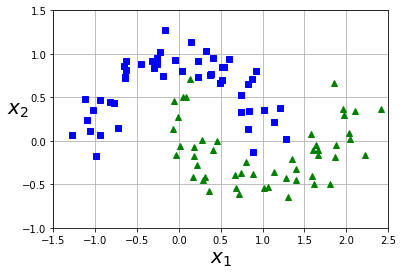

In [20]:
from matplotlib import pyplot as plt
# Lets plot the features x1 and x2

def plot_dataset(X,y):
    plt.plot(X[:,0][y==0], X[:,1][y==0], 'bs')
    plt.plot(X[:,0][y==1], X[:,1][y==1], 'g^')
    plt.axis([-1.5, 2.5,-1,1.5])
    plt.xlabel(r'$x_1$', fontsize=20)
    plt.ylabel(r'$x_2$', fontsize=20, rotation=0)
    plt.grid(True,which='both')

plot_dataset(X,y)

- It can be clearly seen that this dataset can not be linearly seperated.
- Lets convert the dataset to polynomial by using PolynomialFeatures

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('std_scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
])

polynomial_svm_clf.fit(X,y)

C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [60]:
def plot_predictions(clf):
    # generate X_new to predict
    x0s = np.linspace(-1.5, 2.5, 100)
    x1s = np.linspace(-1, 1.5, 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_pred = clf.predict(X_new).reshape(x0.shape)
    y_decision = clf.decision_function(X_new).reshape(x0.shape)
    
    #plot the colors
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    

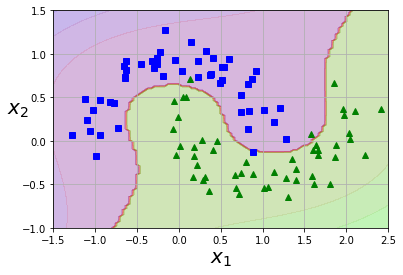

In [61]:
plot_predictions(polynomial_svm_clf)
plot_dataset(X, y)

Examples just for understanding

In [30]:
# generate 3 values between -1.5 and 2.5
x0s = np.linspace(-1.5, 2.5, 3)
x0s

array([-1.5,  0.5,  2.5])

In [33]:
x1s = np.linspace(-1, 1.5, 3)
x1s

array([-1.  ,  0.25,  1.5 ])

In [38]:
# Creates two datasets with same size, they will be used in next cell to form x0,x1 pairs
# see how they are formed
x0, x1 = np.meshgrid(x0s, x1s)
x0, x1

(array([[-1.5,  0.5,  2.5],
        [-1.5,  0.5,  2.5],
        [-1.5,  0.5,  2.5]]),
 array([[-1.  , -1.  , -1.  ],
        [ 0.25,  0.25,  0.25],
        [ 1.5 ,  1.5 ,  1.5 ]]))

In [40]:
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new

array([[-1.5 , -1.  ],
       [ 0.5 , -1.  ],
       [ 2.5 , -1.  ],
       [-1.5 ,  0.25],
       [ 0.5 ,  0.25],
       [ 2.5 ,  0.25],
       [-1.5 ,  1.5 ],
       [ 0.5 ,  1.5 ],
       [ 2.5 ,  1.5 ]])

------------------------------------------------------------------------------------------------------

### 5.2.1 Polynomial Kernel

- Adding polynomial features is simple to implement and can work great with all sorts of Machine Learning algorithms (not just SVMs), but at a low polynomial degree it cannot deal with very complex datasets, and with a high polynomial degree it creates a huge number of features, making the model too slow.
- Fortunately, when using SVMs you can apply an almost miraculous mathematical technique called the **kernel trick**
- It makes it possible to get the same result as if you added many polynomial features, even with very highdegree polynomials, without actually having to add them.
- So there is no combinatorial explosion of the number of features since you don’t actually add any features.
- This trick is implemented by the SVC class.

In [63]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ('std_scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [64]:
# 10 degree
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=100, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

Text(0, 0.5, '')

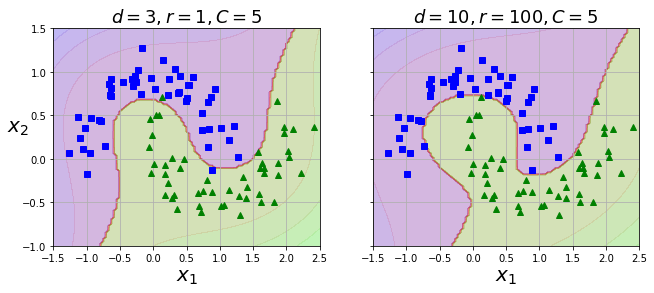

In [75]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf)
plot_dataset(X,y)
plt.title(r'$d=3, r=1, C=5$', fontsize=18)


plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf)
plot_dataset(X,y)
plt.title(r'$d=10, r=100, C=5$', fontsize=18)
plt.ylabel("")

**My comment:**
When you increase the degree of freedom, model better fits to training data.
But be careful to not overfit by testing the model in TEST data.

### 5.2.1 Gaussian RBF Kernel

- The logic is to adding similarity features to dataset.
- But it may be computationally expensive to
compute all the additional features, especially on large training sets.
- However, once again the kernel trick does its SVM magic: it makes it possible to obtain a similar result as if you had added many similarity features, without actually having to add them.

- So **γ** acts like a regularization
hyperparameter: if your model is overfitting, you should reduce it, and if it is underfitting,
you should increase it (similar to the **C** hyperparameter).

In [76]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

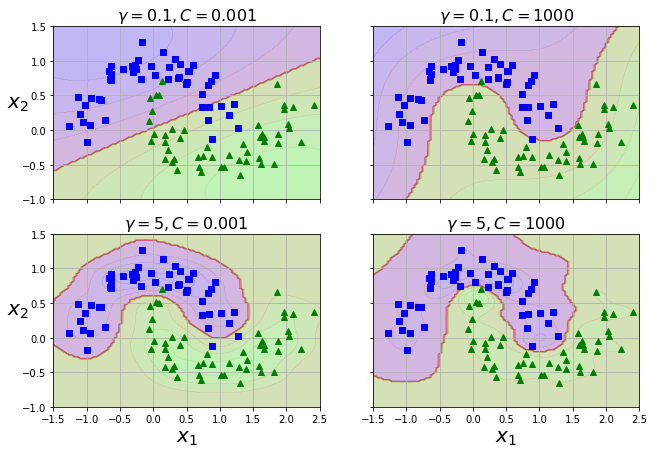

In [79]:
# to understand parameters and effects


from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf)
    plot_dataset(X, y)
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")


plt.show()

### 5.3 SVM Regression

- As we mentioned earlier, the SVM algorithm is quite versatile: not only does it support
linear and nonlinear classification, but it also supports linear and nonlinear
regression.
- The trick is to reverse the objective: instead of trying to fit the largest possible
street between two classes while limiting margin violations, SVM Regression
tries to fit as many instances as possible on the street while limiting margin violations
(i.e., instances off the street).
- The width of the street is controlled by a hyperparameter **ϵ**
     - The more **ϵ**, the wide margin
     - The less **ϵ**, the narrow margin

**Linear**

In [80]:
# create an example dataset

np.random.seed(42)
m = 50
X = 2 * np.random.rand(m,1)
y = (4 + 3 * X + np.random.randn(m,1)).ravel()

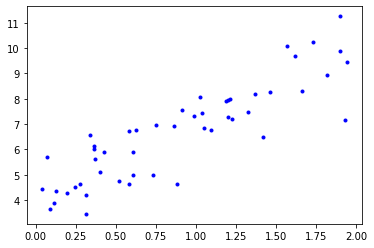

In [82]:
plt.plot(X,y, 'b.')

In [83]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [90]:
# for plotting the results of two models with different epsilon

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X,y)
svm_reg2.fit(X,y)

#find the points off the margin
def find_support_vectors(svm_reg, X,y):
    y_pred = svm_reg.predict(X)
    #returns True if point (instance) off margin, otherwise False
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    
    #returns the indices of True values
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

# just for showing epsilon on chart on below x,y coordinates.
# x1 = 1 is choosen
eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

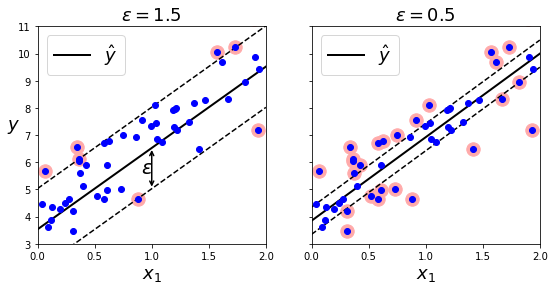

In [95]:
# axes is a parameter to define x, y coordinates intervals
def plot_svm_regression(svm_reg, X, y, axes):
    # create 100 X_new (x1s) values between x coordinate intervals for prediction
    x1s = np.linspace(axes[0], axes[1],100).reshape(100,1)
    y_pred = svm_reg.predict(x1s)
    
    #plot the support vector
    plt.plot(x1s, y_pred, 'k-', linewidth=2, label=r'$\hat{y}$')
    # plot the road
    plt.plot(x1s, y_pred + svm_reg.epsilon, 'k--')
    plt.plot(x1s, y_pred - svm_reg.epsilon, 'k--')
    
    # plot the instances outside the road (support vectors)
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    
    #plot the points
    plt.plot(X,y, 'bo')
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)
    
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

# first chart
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

### This part is for showing epsilon text in the chart
############################################################
# this is for arrow
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
# this is for epsilon text
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
############################################################


# second chart
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()



**Nonlinear**

- To tackle nonlinear regression tasks, kernelized SVM model can be used.

In [97]:
# create sample dataset

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m,1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [98]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [99]:
# for plotting the results of two models with different parameters

from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

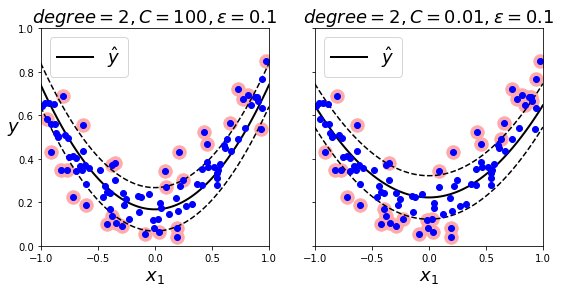

In [100]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

- There is little regularization on the left plot (large C value), and much more regularization on the right plot (small C value)


# Exercises

1. Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

2. Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?

3. Train an SVM regressor on the California housing dataset.

### Exercise 1 - Solution

In [104]:
# Let's use the Iris dataset: the Iris Setosa and Iris Versicolor classes are linearly separable.
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:, (2,3)] # petal length, petal width
y = iris['target']

setosa_or_versicolor = (y==0) | (y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

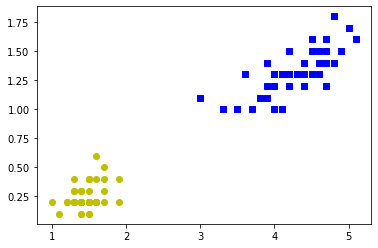

In [132]:
# Lets see how it is 
plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs') # Iris versicolor
plt.plot(X[:,0][y==0], X[:,1][y==0], 'yo') # Iris setosa

In [119]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

# C parameter for SVM, the higher C the less regularization
C = 5

# alpha is regularization parameter for SGDClassifier, the higher alpha, the higher regularization
alpha = 1 / (C* len(X))

lin_clf = LinearSVC(C=C, loss='hinge', random_state=42)
svm_clf = SVC(kernel='linear', C=C)
# By default n_iter_no_change=5, if 5 times the improvement is not higher than tolerance, iteration will be stopped.
sgd_clf = SGDClassifier(loss='hinge', learning_rate = 'constant', eta0=0.001, alpha=alpha, max_iter=1000, tol=1e-3, random_state=42)


#For SVM, features has to be scaled
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)


print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.28474027] [[1.0536456  1.09903032]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]



- Let's plot the decision boundaries of these three models:

How to find the decision boundary?
Use the intercept and coefficients found by models

- Ex:
    - intercept = 1,
    - coeff0 = 3,
    - coeff1 = 5

On the decision boundary, decision function should be equal to 0.
- 3.x0 + 5.x1 + 1 = 0
- 3.x0 + 1 = -5.x1
- -3/5.x0 - 1/5 = x1

- intercept(bias) = -1/5
- slope = -3/5


In [137]:
# Compute the slope and bias of each decision boundary

# LinearSVC
w1 = -lin_clf.coef_[0,0] / lin_clf.coef_[0,1]
b1 = -lin_clf.intercept_[0] / lin_clf.coef_[0,1]
# SVC
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
# SGDClassifier
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

In [139]:
#Ex
w1,b1

(-0.958704766110214, -0.2590831825397911)

To plot the lines, choose arbitrary two points
Ex: LinearSVC

- w1.x0 + b1 = x1
- -0.958.x0 + -0.259 = x1

- Lets say 
 - Point 1
  - x0 = -10, then
  - x1 = 9.32
 - Point 2
  - x0 = -10
  - x1 = -9.83

In [159]:
# Transform the decision boundary lines back to the original scale
# arbitrary x0 points are chosen as -10 and +10. Then x1 values can be calculated.
# then you can create two points
#                                 ( x0,     x1     ) (x0,     x1    )
line1 = scaler.inverse_transform([[-10, w1*-10 + b1],[10, w1*10 + b1]])
line2 = scaler.inverse_transform([[-10, w2*-10 + b2],[10, w2*10 + b2]])
line3 = scaler.inverse_transform([[-10, w3*-10 + b3],[10, w3*10 + b3]])

In [160]:
# Each line contains two x0,x1 pairs
line1

array([[-11.56182566,   6.03130279],
       [ 17.28382566,  -4.7506782 ]])

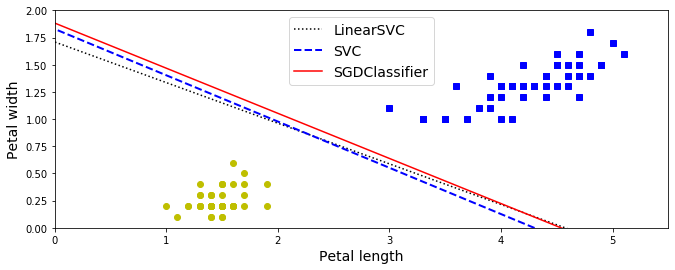

In [164]:
# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:,0],line1[:,1], 'k:', label='LinearSVC')
plt.plot(line2[:,0],line2[:,1], 'b--', linewidth = 2, label='SVC')
plt.plot(line3[:,0],line3[:,1], 'r-', label='SGDClassifier')


plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs') # Iris versicolor
plt.plot(X[:,0][y==0], X[:,1][y==0], 'yo') # Iris setosa
plt.axis([0,5.5,0,2])

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)

- So, it looks all the three models produced roughly same decision boundary.

### Exercise 2 - Solution

Q2) Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?

**Plan**
1. Use LinearSVC
2. Use LinearSVC, do scaling 
3. Use SVC with RBF kernel.
4. Use Randomized search to find better parameters for SVC



- First, let's load the dataset and split it into a training set and a test set. We could use train_test_split() but people usually just take the first 60,000 instances for the training set, and the last 10,000 instances for the test set (this makes it possible to compare your model's performance with others):

In [167]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

Many training algorithms are sensitive to the order of the training instances, so it's generally good practice to shuffle them first. However, the dataset is already shuffled, so we do not need to do it.

Let's start simple, with a linear SVM classifier. It will automatically use the One-vs-All (also called One-vs-the-Rest, OvR) strategy, so there's nothing special we need to do. Easy!

Warning: this may take a few minutes depending on your hardware.

**1. Use LinearSVC**

In [168]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

- Let's make predictions on the training set and measure the accuracy (we don't want to measure it on the test set yet, since we have not selected and trained the final model yet):

In [169]:
from sklearn.metrics import accuracy_score
y_pred = lin_clf.predict(X_train)
accuracy_score(y_train,y_pred)

0.89495

Okay, 89.5% accuracy on MNIST is pretty bad. This linear model is certainly too simple for MNIST, but perhaps we just needed to scale the data first:

**2. User LinearSVC, do scaling**

In [208]:
scaler = StandardScaler()

# Before scaling, the dataset has to be converted to float32, otherwise after scaling you will get 
#example (without converting to float before scaling 0.215, with converting 0.215412345)
# It makes it more precise

X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))

# We will use it later 
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [209]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled,y_train)

C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [210]:
y_pred = lin_clf.predict(X_train)
accuracy_score(y_train,y_pred)

0.81105

That's much better (we cut the error rate by about 25%), but still not great at all for MNIST. If we want to use an SVM, we will have to use a kernel. Let's try an SVC with an RBF kernel (the default).

**3.Use SVC with RBF kernel**

In [211]:
svm_clf = SVC(gamma='scale', kernel='rbf')
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [212]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_pred, y_train)

0.9455333333333333

That's promising, we get better performance even though we trained the model on 6 times less data.(10000 instead of 60000) Let's tune the hyperparameters by doing a randomized search with cross validation. We will do this on a small dataset just to speed up the process:

**4. Use Randomized search to find better parameters for SVC**

In [215]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

#take the parameters from distribution
param_distributions = {'gamma': reciprocal(0.001, 0.1), 'C': uniform(1,10)}

# note: 
# n_iter: Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.

rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:10000], y_train[:10000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=9.64167565071903, gamma=0.0028864931850994023 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=9.64167565071903, gamma=0.0028864931850994023, total=  33.6s
[CV] C=9.64167565071903, gamma=0.0028864931850994023 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.5s remaining:    0.0s


[CV] .. C=9.64167565071903, gamma=0.0028864931850994023, total=  34.9s
[CV] C=9.64167565071903, gamma=0.0028864931850994023 .................
[CV] .. C=9.64167565071903, gamma=0.0028864931850994023, total=  34.1s
[CV] C=5.991933798847523, gamma=0.013931837441736629 .................
[CV] .. C=5.991933798847523, gamma=0.013931837441736629, total= 1.4min
[CV] C=5.991933798847523, gamma=0.013931837441736629 .................
[CV] .. C=5.991933798847523, gamma=0.013931837441736629, total= 1.4min
[CV] C=5.991933798847523, gamma=0.013931837441736629 .................
[CV] .. C=5.991933798847523, gamma=0.013931837441736629, total= 1.4min
[CV] C=8.68554014306309, gamma=0.0012223836813745606 .................
[CV] .. C=8.68554014306309, gamma=0.0012223836813745606, total=  21.4s
[CV] C=8.68554014306309, gamma=0.0012223836813745606 .................
[CV] .. C=8.68554014306309, gamma=0.0012223836813745606, total=  21.7s
[CV] C=8.68554014306309, gamma=0.0012223836813745606 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 33.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A500EE22C8>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A500EE2D08>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [216]:
rnd_search_cv.best_estimator_

SVC(C=8.68554014306309, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.0012223836813745606, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [217]:
rnd_search_cv.best_score_

0.9392998388021166

This looks pretty low but remember we only trained the model on 10,000 instances. Let's retrain the best estimator on the whole training set (run this at night, it will take hours):

In [218]:
rnd_search_cv.best_estimator_.fit(X_train_scaled,y_train)

SVC(C=8.68554014306309, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.0012223836813745606, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [219]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)

In [220]:
accuracy_score(y_train, y_pred)

0.9987333333333334

Ah, this looks good! Let's select this model. Now we can test it on the test set:

In [221]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9733

Not too bad, but apparently the model is overfitting slightly. It's tempting to tweak the hyperparameters a bit more (e.g. decreasing C and/or gamma), but we would run the risk of overfitting the test set. Other people have found that the hyperparameters C=5 and gamma=0.005 yield even better performance (over 98% accuracy). By running the randomized search for longer and on a larger part of the training set, you may be able to find this as well.

### Exercise 3 - Solution

Q3. Train an SVM regressor on the California housing dataset.

1. First, try LinearSVR
2. try SVC but use Randomized search to find better parameters for SVC

In [222]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [226]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [228]:
scaler = StandardScaler()

X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**1. LinearSVR**

Let's train a simple LinearSVR first:

In [229]:
lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

Let's see how it performs on the training set:

In [230]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error( y_pred, y_train)
mse

0.9612806653297273

In [231]:
# Root mean squared

rmse = np.sqrt(mse)

In this training set, the targets are tens of thousands of dollars. The RMSE gives a rough idea of the kind of error you should expect (with a higher weight for large errors): so with this model we can expect errors somewhere around $10,000. Not great. Let's see if we can do better with an RBF Kernel. We will use randomized search with cross validation to find the appropriate hyperparameter values for C and gamma:

**4. Use Randomized search to find better parameters for SVC**

In [232]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}

rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   5.9s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s


[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   5.7s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................
[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   5.9s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   5.7s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   8.4s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   8.2s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   5.9s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   5.3s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A500CCA288>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A500EA1488>},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [233]:
rnd_search_cv.best_estimator_

SVR(C=4.745401188473625, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma=0.07969454818643928, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

Now let's measure the RMSE on the training set:

In [234]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.5727524770785357

Looks much better than the linear model. Let's select this model and evaluate it on the test set:

In [235]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.5929168385528746